In [1]:
import fsspec
import xarray as xr
from kerchunk.netCDF3 import NetCDF3ToZarr


fs_read = fsspec.filesystem('s3', anon=True, skip_instance_cache=True, use_ssl=False) # For now SSL false is solving my cert issues **shrug**
fs_write = fsspec.filesystem('')

In [2]:
ngofs_files = fs_read.glob('s3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f*.20230928.t09z.nc')

ngofs_files = sorted(['s3://'+f for f in ngofs_files])
ngofs_files

['s3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f000.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f001.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f002.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f003.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f004.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f005.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f006.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f007.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f008.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f009.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f010.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f011.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f012.20230928.t09z.nc',
 's3://noaa-ofs-pds/ngofs

In [3]:
import ujson

def generate_json(f):
    outname = f'./ngofs2/{f}.zarr'
    
    with fs_write.open(f) as ifile:
        chunks = NetCDF3ToZarr(ifile)
        with fs_write.open(outname, 'w') as ofile:
            ofile.write(ujson.dumps(chunks.translate()))

    return outname

In [2]:
import ujson

outname = './ngofs2/outtttt.zarr'
chunks = NetCDF3ToZarr('./nos.ngofs2.2ds.f001.20230928.t09z.nc')
with open(outname, 'w') as ofile:
    ofile.write(ujson.dumps(chunks.translate()))

{'nprocs': <scipy.io._netcdf.netcdf_variable object at 0x106d68af0>, 'partition': <scipy.io._netcdf.netcdf_variable object at 0x106d0bd90>, 'x': <scipy.io._netcdf.netcdf_variable object at 0x106d0bcd0>, 'y': <scipy.io._netcdf.netcdf_variable object at 0x106d0b8e0>, 'lon': <scipy.io._netcdf.netcdf_variable object at 0x106d0bf40>, 'lat': <scipy.io._netcdf.netcdf_variable object at 0x12a579ff0>, 'xc': <scipy.io._netcdf.netcdf_variable object at 0x12a579b10>, 'yc': <scipy.io._netcdf.netcdf_variable object at 0x12a57a4a0>, 'lonc': <scipy.io._netcdf.netcdf_variable object at 0x12a579a20>, 'latc': <scipy.io._netcdf.netcdf_variable object at 0x12a57a4d0>, 'h': <scipy.io._netcdf.netcdf_variable object at 0x12a5798a0>, 'nv': <scipy.io._netcdf.netcdf_variable object at 0x12a57a320>, 'iint': <scipy.io._netcdf.netcdf_variable object at 0x12a57a2f0>, 'time': <scipy.io._netcdf.netcdf_variable object at 0x12a579cc0>, 'Itime': <scipy.io._netcdf.netcdf_variable object at 0x12a57a530>, 'Itime2': <scipy.i

In [4]:
print(f'Generating Zarr metadata for {ngofs_files[1]}')
print(f'Wrote Zarr metadata to {generate_json("./nos.ngofs2.2ds.f001.20230928.t09z.nc")}')

Generating Zarr metadata for s3://noaa-ofs-pds/ngofs2.20230928/nos.ngofs2.2ds.f001.20230928.t09z.nc
{'nprocs': <scipy.io._netcdf.netcdf_variable object at 0x10d946ad0>, 'partition': <scipy.io._netcdf.netcdf_variable object at 0x10da329b0>, 'x': <scipy.io._netcdf.netcdf_variable object at 0x10da33d00>, 'y': <scipy.io._netcdf.netcdf_variable object at 0x10da33e80>, 'lon': <scipy.io._netcdf.netcdf_variable object at 0x1318fdcc0>, 'lat': <scipy.io._netcdf.netcdf_variable object at 0x1318fd270>, 'xc': <scipy.io._netcdf.netcdf_variable object at 0x1319f1750>, 'yc': <scipy.io._netcdf.netcdf_variable object at 0x1319f2290>, 'lonc': <scipy.io._netcdf.netcdf_variable object at 0x1319f23e0>, 'latc': <scipy.io._netcdf.netcdf_variable object at 0x1319f24d0>, 'h': <scipy.io._netcdf.netcdf_variable object at 0x1319f1720>, 'nv': <scipy.io._netcdf.netcdf_variable object at 0x1319f13c0>, 'iint': <scipy.io._netcdf.netcdf_variable object at 0x1319f13f0>, 'time': <scipy.io._netcdf.netcdf_variable object at

TypeError: <fsspec.implementations.local.LocalFileOpener object at 0x10da33c70> is not JSON serializable

In [5]:
import cf_xarray
# open dataset as zarr object using fsspec reference file system and xarray
fs = fsspec.filesystem("reference", fo='./ngofs2/outtttt.zarr', remote_protocol='file')
m = fs.get_mapper("")

ds = xr.open_dataset(m, engine="zarr", backend_kwargs=dict(consolidated=False), chunks={}, drop_variables=['Itime2'])
ds

<xarray.Dataset>
Dimensions:             (time: 1, four: 4, nele: 569405, node: 303714,
                         three: 3, maxnode: 10, maxelem: 8)
Coordinates:
    lat                 (node) float32 dask.array<chunksize=(303714,), meta=np.ndarray>
    latc                (nele) float32 dask.array<chunksize=(569405,), meta=np.ndarray>
    lon                 (node) float32 dask.array<chunksize=(303714,), meta=np.ndarray>
    lonc                (nele) float32 dask.array<chunksize=(569405,), meta=np.ndarray>
  * time                (time) datetime64[ns] 2023-09-28T09:59:56.484375008
Dimensions without coordinates: four, nele, node, three, maxnode, maxelem
Data variables: (12/38)
    Itime               (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Times               (time) |S26 dask.array<chunksize=(1,), meta=np.ndarray>
    a1u                 (four, nele) float32 dask.array<chunksize=(4, 569405), meta=np.ndarray>
    a2u                 (four, nele) float32 dask.array<chunksize=(4, 569405), meta=np.ndarray>
    art1                (node) float32 dask.array<chunksize=(303714,), meta=np.ndarray>
    art2                (node) float32 dask.array<chunksize=(303714,), meta=np.ndarray>
    ...                  ...
    wet_nodes_prev_int  (time, node) int32 dask.array<chunksize=(1, 303714), meta=np.ndarray>
    x                   (node) float32 dask.array<chunksize=(303714,), meta=np.ndarray>
    xc                  (nele) float32 dask.array<chunksize=(569405,), meta=np.ndarray>
    y                   (node) float32 dask.array<chunksize=(303714,), meta=np.ndarray>
    yc                  (nele) float32 dask.array<chunksize=(569405,), meta=np.ndarray>
    zeta                (time, node) float32 dask.array<chunksize=(1, 303714), meta=np.ndarray>
Attributes: (12/14)
    Conventions:                 CF-1.0
    CoordinateProjection:        init=nad83:4205
    CoordinateSystem:            GeoReferenced
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    River_Forcing:               THERE ARE 63 RIVERS IN THIS MODEL.\nRIVER IN...
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    ...                          ...
    Tidal_Forcing:               TIDAL ELEVATION FORCING IS OFF!
    history:                     model started at: 28/09/2023   09:14
    institution:                 School for Marine Science and Technology
    references:                  http://fvcom.smast.umassd.edu, http://codfis...
    source:                      FVCOM_4.3
    title:                       NGOFS2

In [15]:
zeta = ds.zeta.cf.isel(time=0)
zeta

<xarray.DataArray 'zeta' (node: 303714)>
dask.array<getitem, shape=(303714,), dtype=float32, chunksize=(303714,), chunktype=numpy.ndarray>
Coordinates:
    lat      (node) float32 dask.array<chunksize=(303714,), meta=np.ndarray>
    lon      (node) float32 dask.array<chunksize=(303714,), meta=np.ndarray>
    time     datetime64[ns] 2023-09-28T09:59:56.484375008
Dimensions without coordinates: node
Attributes:
    grid:           Bathymetry_Mesh
    location:       node
    long_name:      Water Surface Elevation
    positive:       up
    standard_name:  sea_surface_height_above_geoid
    type:           data
    units:          meters

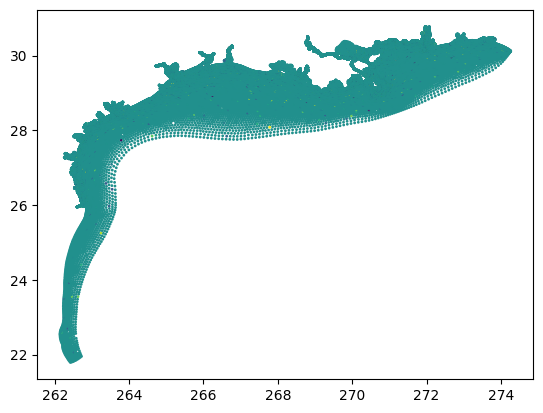

In [17]:
import matplotlib.pyplot as plt

plt.scatter(zeta.cf['longitude'], zeta.cf['latitude'], c=zeta, s=1)